## Importing Libraries

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Load the dataset

In [488]:
df = pd.read_csv('./Dataset/order_dataset.csv')

### Initial Analysis

In [489]:
# ---- Display the First 5 Rows ----
display(HTML("<h3 style='text-align:center; color:mediumblue;'>First 5 Rows of the DataFrame</h3>"))
display(df.head())
print("\n\n")

# ---- Display the Last 5 Rows ----
display(HTML("<h3 style='text-align:center; color:mediumblue;'>Last 5 Rows of the DataFrame</h3>"))
display(df.tail())
print("\n\n")

# ---- Display a Concise Summary ----
display(HTML("<h3 style='text-align:center; color:mediumblue;'>Concise Summary of the DataFrame</h3>"))
df.info()
print("\n\n")

# ---- Display Descriptive Statistics ----
display(HTML("<h3 style='text-align:center; color:mediumblue;'>Descriptive Statistics of the DataFrame</h3>"))
display(df.describe())
print("\n\n")

# ---- Check for Missing Values ----
display(HTML("<h3 style='text-align:center; color:mediumblue;'>Missing Values in Each Column</h3>"))
display(df.isnull().sum().to_frame("Missing Count"))


,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
0,QID,Product H,32 / B / 30,27-0CD-F44-7E1-0-2F608D7,46567054.0,3301861.0,5.363560e+13,14/04/2019,1,74.17,0.0,0.00,74.17,14.83,89.0,0,1
1,OTH,Product P,32 / B / FtO,37-9D1-AC6-D48-E-F2D4507,16345004.0,1205940.0,4.759180e+13,14/02/2019,-1,0.00,0.0,-79.17,-79.17,-15.83,-95.0,-1,0
2,WHX,Product P,32 / B / FtO,85-2EB-163-D62-5-FC50316,26246865.0,3342830.0,9.211720e+13,28/11/2018,-1,0.00,0.0,-74.17,-74.17,-14.83,-89.0,-1,0
3,RJF,Product P,33 / B / FtO,3D-687-99C-14F-4-661E2E7,42015157.0,7251983.0,5.987730e+13,3/3/2019,1,79.17,0.0,0.00,79.17,15.83,95.0,0,1
4,TSH,Product D,34 / B / FtO,F9-9FA-787-104-B-DCEE379,40522014.0,9940388.0,3.658240e+13,26/11/2018,1,74.17,0.0,0.00,74.17,14.83,89.0,0,1


,Item Name,Category,Version,Item Code,Item ID,Buyer ID,Transaction ID,Date,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
70047,RJF,Product P,36 / B / FtO,7C-D23-B98-39F-E-93ABC5C,56109013.0,3421398.0,1.498000e+13,20/11/2018,1,79.16,0.00,0.0,79.16,15.84,95.0,0,1
70048,KNB,Product P,33 / A / FtO,10-D34-C89-3B7-8-77333AA,35445869.0,1913362.0,1.506840e+13,3/4/2019,1,79.16,-7.91,0.0,71.25,14.25,85.5,0,1
70049,XEB,Product D,34 / A / FtO,EA-048-158-A25-3-11DAA3E,27215940.0,9781863.0,6.776480e+13,26/12/2018,1,51.67,0.00,0.0,51.67,10.33,62.0,0,1
70050,AYN,Product P,36 / B / FtO,89-517-B97-D81-B-F23CCC1,89883040.0,6808059.0,2.156440e+13,12/1/2019,1,55.00,0.00,0.0,55.00,11.00,66.0,0,1
70051,NWB,Product H,36 / B / 32,08-E8A-524-409-1-7A032D2,11926413.0,3582530.0,6.202560e+13,17/11/2018,1,74.16,0.00,0.0,74.16,14.84,89.0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item Name             70052 non-null  object 
 1   Category              70052 non-null  object 
 2   Version               70052 non-null  object 
 3   Item Code             70052 non-null  object 
 4   Item ID               70052 non-null  float64
 5   Buyer ID              70052 non-null  float64
 6   Transaction ID        70052 non-null  float64
 7   Date                  70052 non-null  object 
 8   Final Quantity        70052 non-null  int64  
 9   Total Revenue         70052 non-null  float64
 10  Price Reductions      70052 non-null  float64
 11  Refunds               70052 non-null  float64
 12  Final Revenue         70052 non-null  float64
 13  Sales Tax             70052 non-null  float64
 14  Overall Revenue       70052 non-null  float64
 15  Refunded Item Count

,Item ID,Buyer ID,Transaction ID,Final Quantity,Total Revenue,Price Reductions,Refunds,Final Revenue,Sales Tax,Overall Revenue,Refunded Item Count,Purchased Item Count
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442318e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255077e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000660e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270320e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522210e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736880e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422210e+13,9.977410e+13,9.999550e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


,Missing Count
Item Name,0
Category,0
Version,0
Item Code,0
Item ID,0
Buyer ID,0
Transaction ID,0
Date,0
Final Quantity,0
Total Revenue,0


## Data Cleaning and Preprocessing

In [490]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x>=5 else 0)

In [491]:
df = df.drop(['Item Name', 'Item Code', 'Item ID', 'Transaction ID'], axis = 1)

## Feature Engineering for Analysis

In [492]:
df.head()
df['is_returned'] = df.apply(
    lambda row: 1 if (row['Refunded Item Count'] < 0 or row['Final Quantity'] < 0 or row['Refunds'] < 0) else 0, 
    axis=1
)
df['Category'].nunique()
df['Category']
freq_of_category = df['Category'].value_counts()[0:5]/len(df)*100
freq_of_category.index

Index(['Product P', 'Product H', 'Product D', 'Product B', 'Product N'], dtype='object', name='Category')

In [493]:
df[df['Category'].isin(freq_of_category.index)]
df['Category'] = df['Category'].apply(lambda x : 'other' if x not in freq_of_category.index else x)
df['Category'].unique()

array(['Product H', 'Product P', 'Product D', 'other', 'Product B',
       'Product N'], dtype=object)

Apply One Hot Encoding

In [494]:
for col in ['Category']:
    col_encoded = pd.get_dummies(df[col] , prefix=col , drop_first=True)
    df = pd.concat([df , col_encoded] , axis=1)

In [495]:
df['Version'].value_counts()/len(df)*100

Version
34 / B / FtO    8.131103
32 / A / FtO    6.512305
36 / B / FtO    5.682921
34 / A / FtO    5.434534
32 / B / FtO    5.054816
                  ...   
31 / C / 29     0.001428
28 / C / 31     0.001428
40 / A / 7      0.001428
30 / A / 27     0.001428
40 / B / 28     0.001428
Name: count, Length: 371, dtype: float64

## Exploratory Data Analysis (EDA)


### Sales Performance

#### Aggregate by Date and sum Overall Revenue for sales trends

In [496]:
daily_sales = df.groupby('Date')['Overall Revenue'].sum().reset_index()
print("Daily Sales Data (first 5 rows):")
display(daily_sales.head())
print("\n")

Daily Sales Data (first 5 rows):


,Date,Overall Revenue
0,2018-11-01,20996.82
1,2018-11-02,14608.96
2,2018-11-03,20912.78
3,2018-11-04,38580.60
4,2018-11-05,14510.47


#### Plot Overall Revenue over time

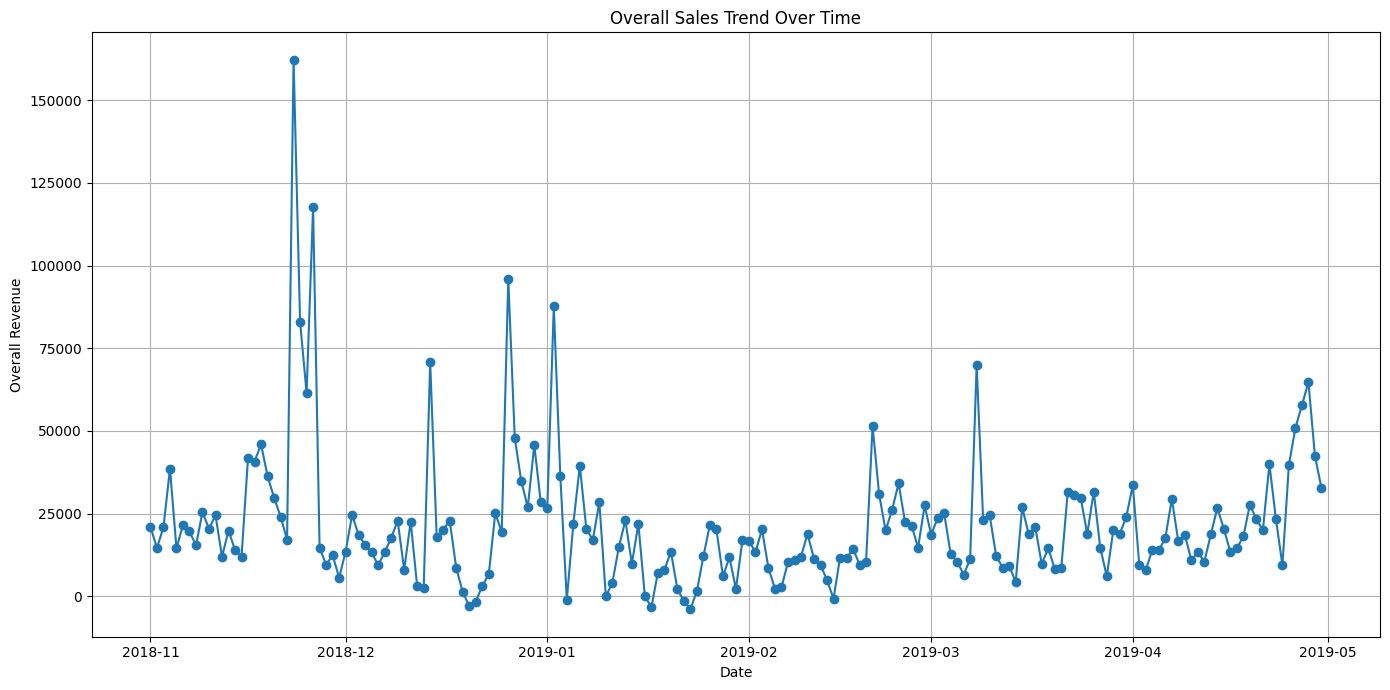

In [497]:
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Overall Revenue'], marker='o', linestyle='-')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Overall Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Monthly Sales Trend (Overall Revenue)

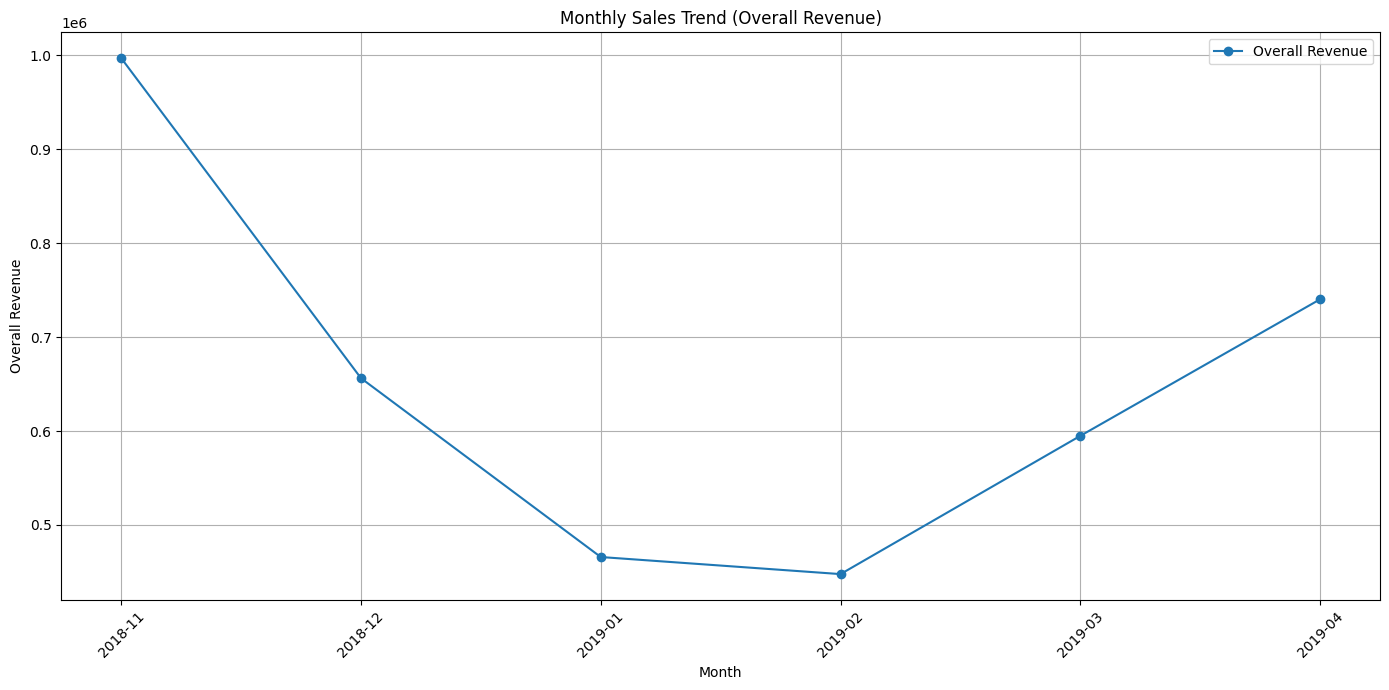

In [498]:
# Extract the month from the 'Date' column and store it in a new column named 'Month'.
df['Month'] = df['Date'].dt.to_period('M')

# Group the DataFrame by 'Month' and sum 'Overall Revenue' to calculate monthly sales trends.
monthly_sales_revenue = df.groupby('Month')['Overall Revenue'].sum().reset_index()

# Create a line plot to visualize the monthly sales trend of 'Overall Revenue'
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales_revenue['Month'].astype(str), monthly_sales_revenue['Overall Revenue'], marker='o', linestyle='-', label='Overall Revenue')
plt.title('Monthly Sales Trend (Overall Revenue)')
plt.xlabel('Month')
plt.ylabel('Overall Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


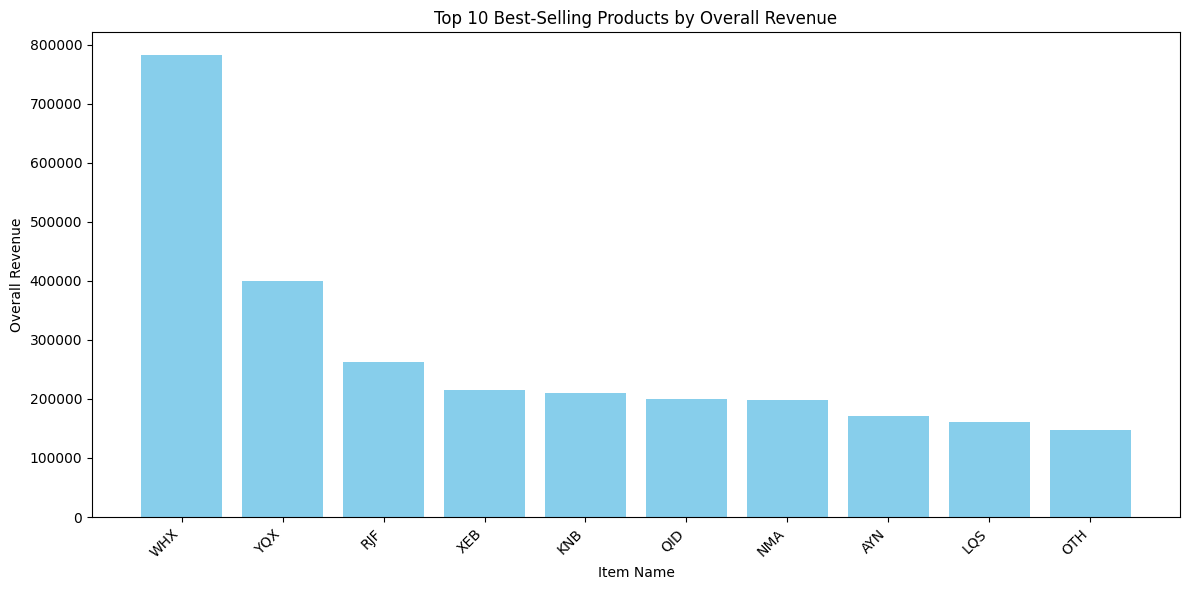

In [499]:
# Bar plot of top_products
plt.figure(figsize=(12, 6))
plt.bar(top_products['Item Name'], top_products['Overall Revenue'], color='skyblue')
plt.title('Top 10 Best-Selling Products by Overall Revenue')
plt.xlabel('Item Name')
plt.ylabel('Overall Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Top 10 Best-Selling Categories by Overall Revenue

In [500]:
# Group by Category and sum Overall Revenue for top categories
top_categories = df.groupby('Category')['Overall Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Print top_categories DataFrame
print("Top 10 Best-Selling Categories by Overall Revenue:")
display(top_categories)
print("\n")

Top 10 Best-Selling Categories by Overall Revenue:


,Category,Overall Revenue
0,Product P,1345870.72
1,other,1030884.97
2,Product H,848232.33
3,Product D,362369.22
4,Product B,211079.13
5,Product N,103739.01


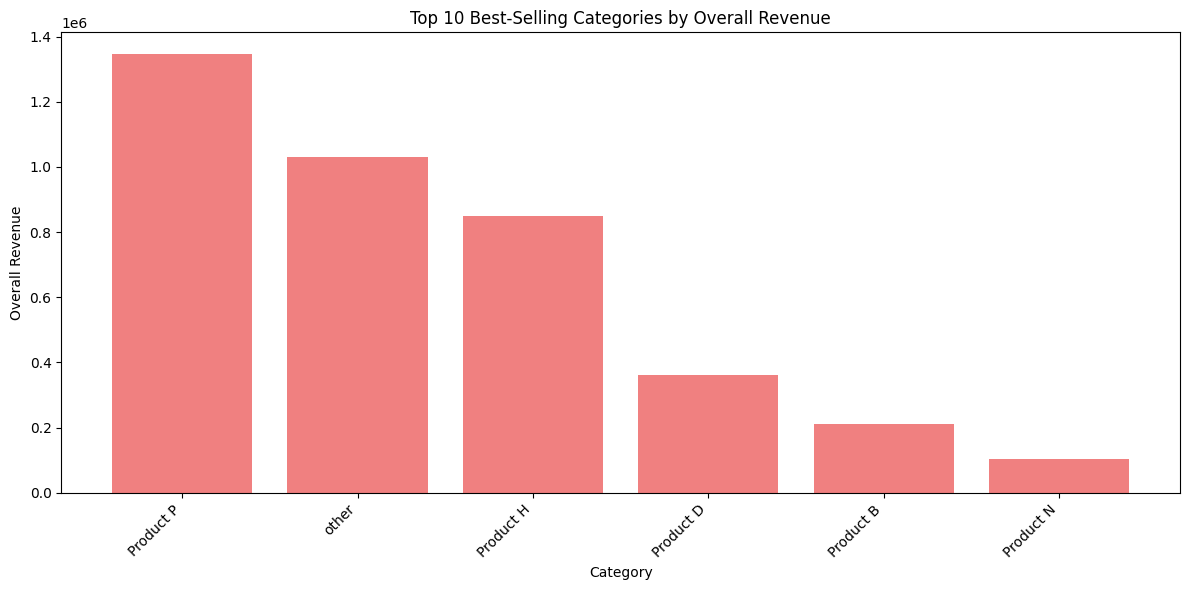

In [501]:
# Create a bar plot of top_categories
plt.figure(figsize=(12, 6))
plt.bar(top_categories['Category'], top_categories['Overall Revenue'], color='lightcoral')
plt.title('Top 10 Best-Selling Categories by Overall Revenue')
plt.xlabel('Category')
plt.ylabel('Overall Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Customer Behavior

#### Calculate Total Spending for each customer

In [502]:
total_spending = df.groupby('Buyer ID')['Overall Revenue'].sum().reset_index()
total_spending.columns = ['Buyer ID', 'Total Spending']
print("\nCustomer Total Spending (first 5 rows):\n")
display(total_spending.head())


Customer Total Spending (first 5 rows):



,Buyer ID,Total Spending
0,1000661.0,86.67
1,1001914.0,79.20
2,1002167.0,167.45
3,1002387.0,89.00
4,1002419.0,53.10


In [503]:
# Merge customer metrics into a single DataFrame for easier analysis if needed later
customer_behavior_df = purchase_frequency.merge(average_order_value, on='Buyer ID')
customer_behavior_df = customer_behavior_df.merge(total_spending, on='Buyer ID')

#### Purchase Frequency

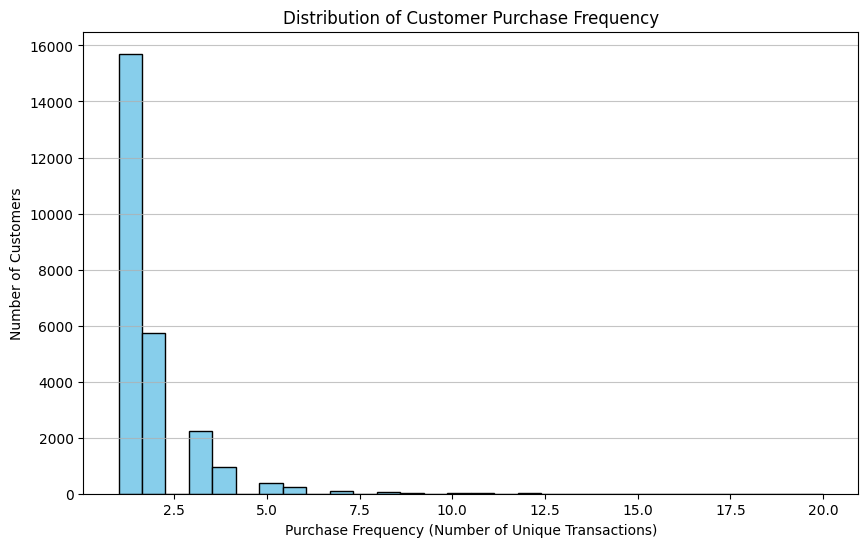

In [504]:
# Create a histogram for Purchase Frequency
plt.figure(figsize=(10, 6))
plt.hist(customer_behavior_df['Purchase Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Purchase Frequency (Number of Unique Transactions)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Average Order Value

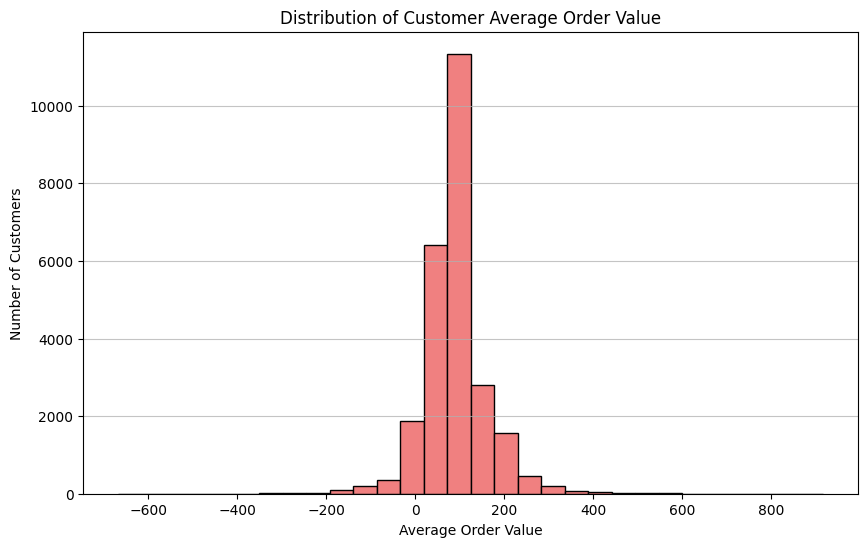

In [505]:
# Create a histogram for Average Order Value
plt.figure(figsize=(10, 6))
plt.hist(customer_behavior_df['Average Order Value'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Customer Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Total Spending

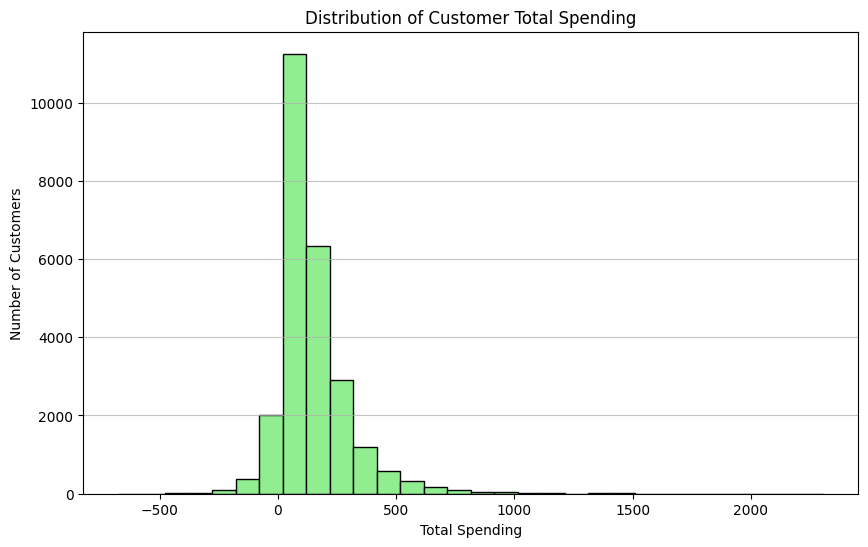

In [506]:
# Create a histogram for Total Spending
plt.figure(figsize=(10, 6))
plt.hist(customer_behavior_df['Total Spending'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Customer Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Analysis of Returns and Discounts


#### Total Impact of Refunds, Price Reductions, and Sales Tax:


In [507]:
# Calculate the total sum of 'Refunds', 'Price Reductions', and 'Sales Tax'
total_refunds = df['Refunds'].sum()
total_price_reductions = df['Price Reductions'].sum()
total_sales_tax = df['Sales Tax'].sum()

impact_data = pd.Series({
    'Total Refunds': total_refunds,
    'Total Price Reductions': total_price_reductions,
    'Total Sales Tax': total_sales_tax
})

print("Total Impact of Refunds, Price Reductions, and Sales Tax:")
display(impact_data)

Total Impact of Refunds, Price Reductions, and Sales Tax:


Total Refunds            -717756.33
Total Price Reductions   -346750.66
Total Sales Tax           639128.98
dtype: float64

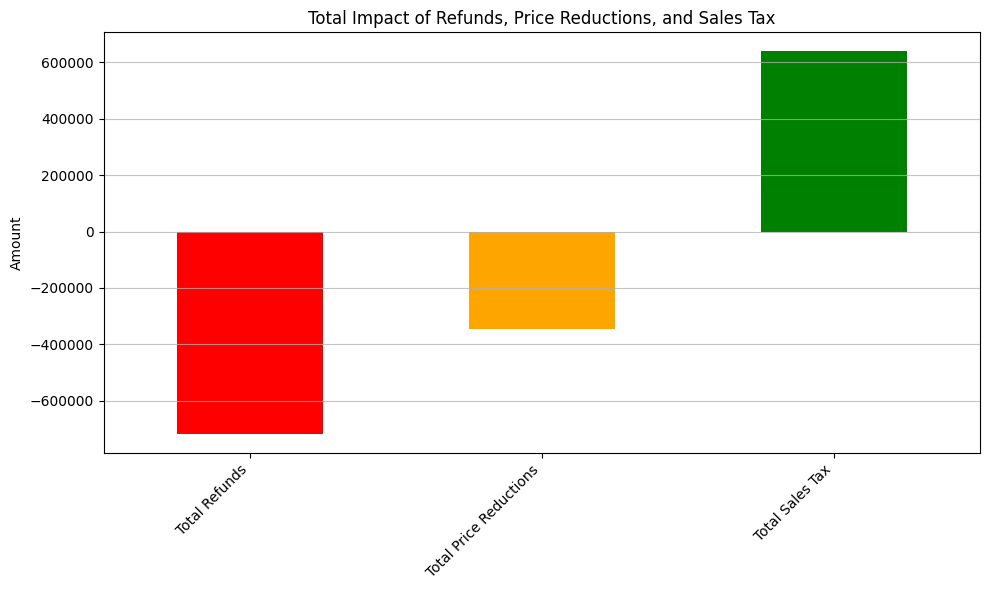

In [508]:
# Create a bar chart to visualize these total amounts
plt.figure(figsize=(10, 6))
impact_data.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Total Impact of Refunds, Price Reductions, and Sales Tax')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

#### Total 'Refunded Item Count', 'Purchased Item Count', 'Overall Item Return Rate'

In [509]:
# Calculate total 'Refunded Item Count' and 'Purchased Item Count'
total_refunded_items = df['Refunded Item Count'].abs().sum()
total_purchased_items = df['Purchased Item Count'].abs().sum()

print(f"Total Refunded Items: {total_refunded_items}")
print(f"Total Purchased Items: {total_purchased_items}")

# Calculate the overall item return rate
# Avoid division by zero
if total_purchased_items > 0:
    overall_return_rate = total_refunded_items / total_purchased_items
    print(f"Overall Item Return Rate: {overall_return_rate:.2%}")
else:
    print("No items were purchased, cannot calculate return rate.")

Total Refunded Items: 10935
Total Purchased Items: 60054
Overall Item Return Rate: 18.21%


#### Distribution of Refund Amounts

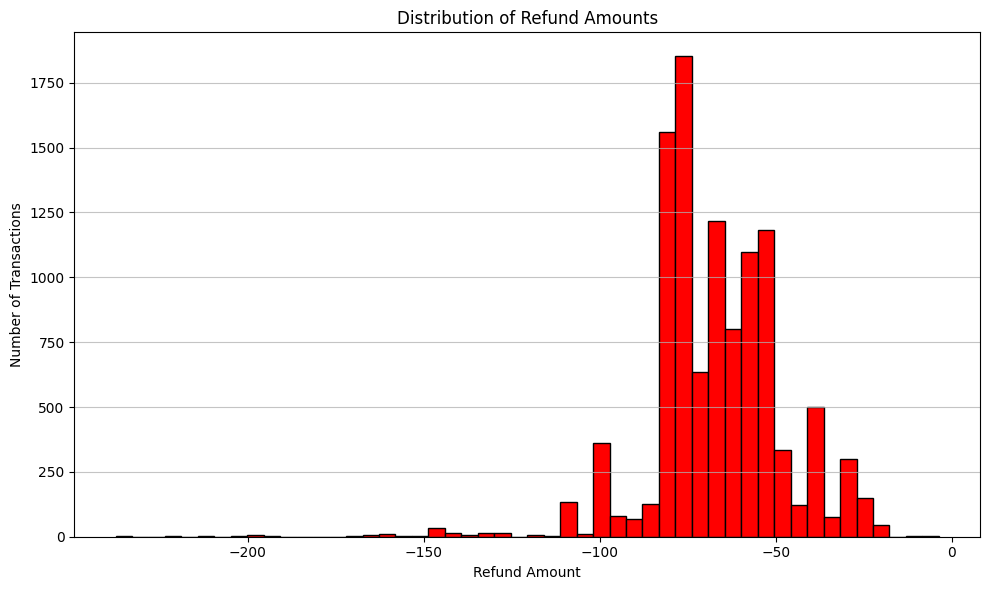

In [510]:
# Create a histogram for 'Refunds' where refunds occurred (Refunds < 0)
refund_amounts = df[df['Refunds'] < 0]['Refunds']

plt.figure(figsize=(10, 6))
plt.hist(refund_amounts, bins=50, color='red', edgecolor='black')
plt.title('Distribution of Refund Amounts')
plt.xlabel('Refund Amount')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Customer Segmentation using Clustering

####  Applying  K-Means,  clustering algorithm to segment customers based on their RFM values. Determine an optimal number of clusters for effective segmentation.


Applying StandardScaler to RFM values...
RFM values scaled successfully. Displaying head of rfm_scaled:


,Recency_scaled,Frequency_scaled,Monetary_scaled
Buyer ID,,,
1000661,1.022729,-0.562685,-0.430965
1001914,1.327556,-0.562685,-0.479671
1002167,-0.555196,1.863080,0.095743
1002387,-0.716575,-0.562685,-0.415772
1002419,0.197905,-0.562685,-0.649850



Implementing Elbow Method to find optimal number of clusters...


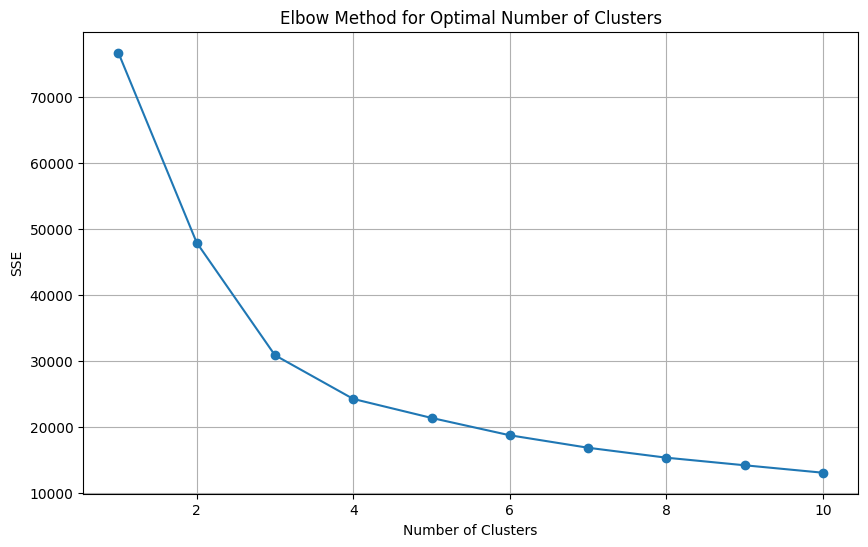

In [511]:
print("Applying StandardScaler to RFM values...")
# Create a new DataFrame `rfm_scaled` by applying `StandardScaler`
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'], index=rfm.index)
print("RFM values scaled successfully. Displaying head of rfm_scaled:")
display(rfm_scaled.head())

print("\nImplementing Elbow Method to find optimal number of clusters...")
# Implement the Elbow Method to find the optimal number of clusters
sse = []
# Loop through a range of possible cluster numbers (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is set to 10 to suppress future warning
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the `sse` values against the number of clusters to visualize the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [512]:
print("Applying K-Means clustering with optimal number of clusters...")

# Based on the elbow plot, choose an optimal number of clusters (e.g., 4)
# Assuming 4 clusters based on a typical elbow point for such data
optimal_clusters = 4

# Apply K-Means clustering with the chosen optimal number of clusters to the `rfm_scaled` data
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the head of the RFM DataFrame with the new 'Cluster' column
print(f"K-Means clustering applied with {optimal_clusters} clusters.")
print("RFM DataFrame with cluster labels (head):")
display(rfm.head())

Applying K-Means clustering with optimal number of clusters...
K-Means clustering applied with 4 clusters.
RFM DataFrame with cluster labels (head):


,Recency,Frequency,Monetary,Cluster
Buyer ID,,,,
1000661,142,1,86.67,0
1001914,159,1,79.20,0
1002167,54,4,167.45,1
1002387,45,1,89.00,2
1002419,96,1,53.10,0


Creating pairwise scatter plots of RFM values colored by cluster...


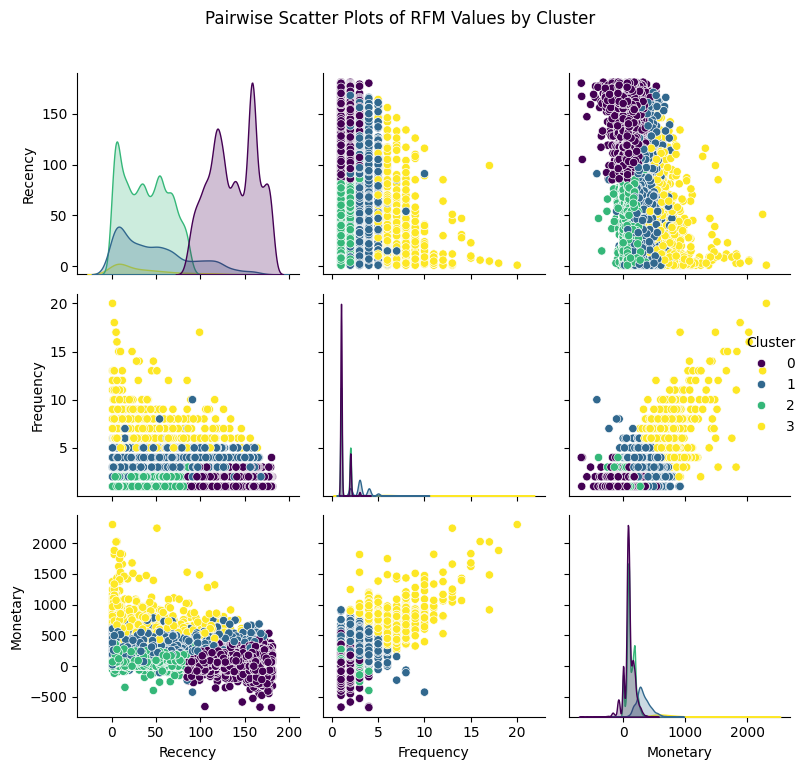

In [513]:
print("Creating pairwise scatter plots of RFM values colored by cluster...")
sns.pairplot(rfm, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster', palette='viridis')
plt.suptitle('Pairwise Scatter Plots of RFM Values by Cluster', y=1.02) # Adjust suptitle to not overlap
plt.tight_layout()
plt.show()

## Characterize Customer Segments

#### Analyzing and describing the characteristics of each identified customer segment based on their RFM scores and other relevant transactional data. Visualize the segments and their profiles with legends.


In [514]:
print("Characterizing customer segments...")

# Group the rfm DataFrame by the 'Cluster' column
# Calculate the mean of 'Recency', 'Frequency', and 'Monetary' for each cluster
cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nMean RFM values for each cluster:")
display(cluster_profiles)

Characterizing customer segments...

Mean RFM values for each cluster:


,Recency,Frequency,Monetary
Cluster,,,
0,136.727506,1.209828,91.370918
1,49.684223,3.115825,317.003082
2,38.121319,1.328681,117.502546
3,33.942511,6.531014,704.234312


In [515]:
# Calculate the number of customers in each cluster
cluster_counts = rfm['Cluster'].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
display(cluster_counts)


Number of customers in each cluster:


Cluster
0    11681
1     4101
2     9100
3      661
Name: count, dtype: int64

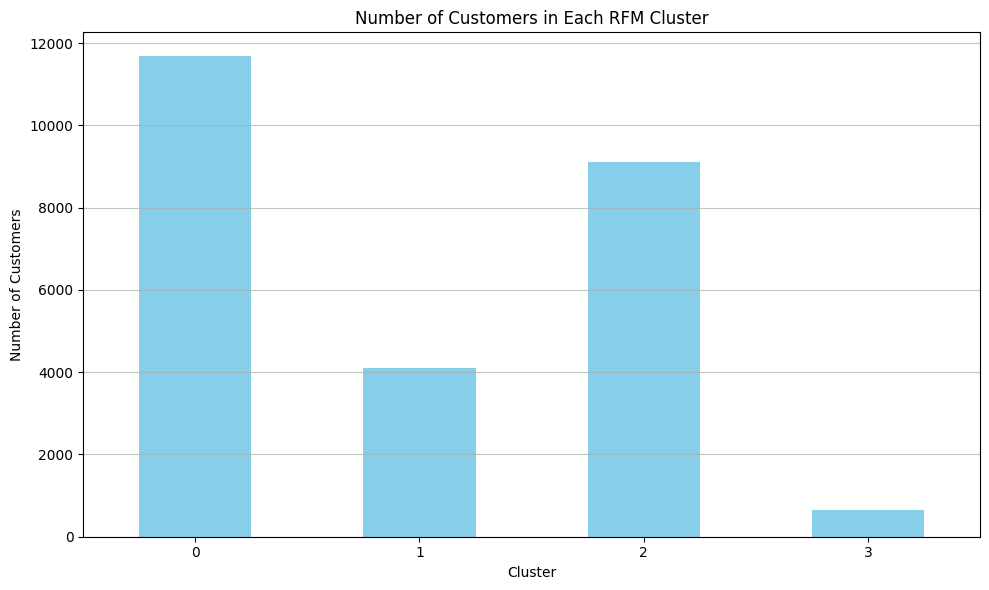

In [516]:
# Create a bar plot to visualize the count of customers in each cluster
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each RFM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

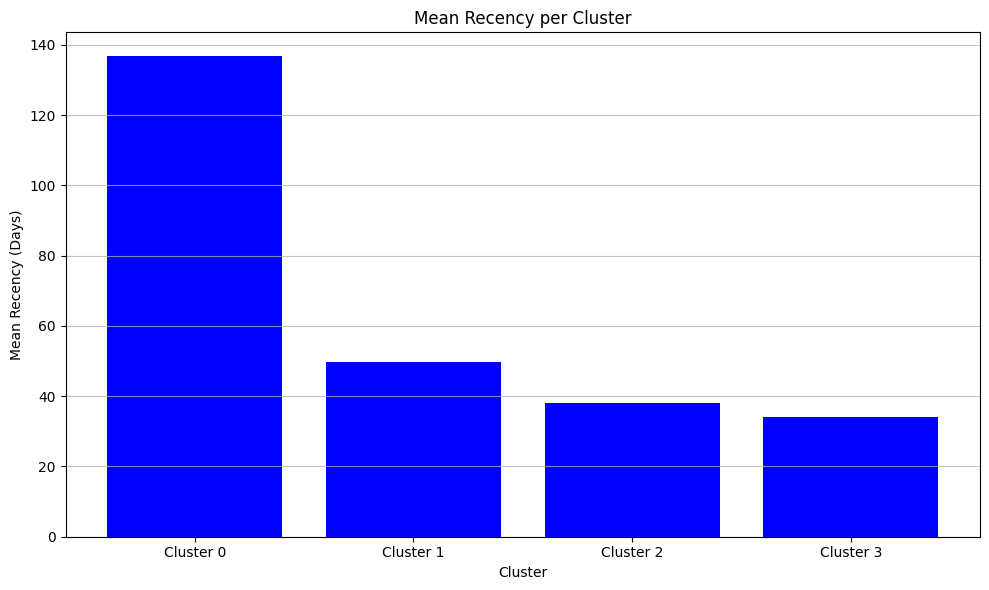

In [517]:
# Plot for Recency
plt.figure(figsize=(10, 6))
plt.bar(cluster_profiles.index, cluster_profiles['Recency'], color='blue')
plt.title('Mean Recency per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Recency (Days)')
plt.xticks(cluster_profiles.index, [f'Cluster {i}' for i in cluster_profiles.index])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

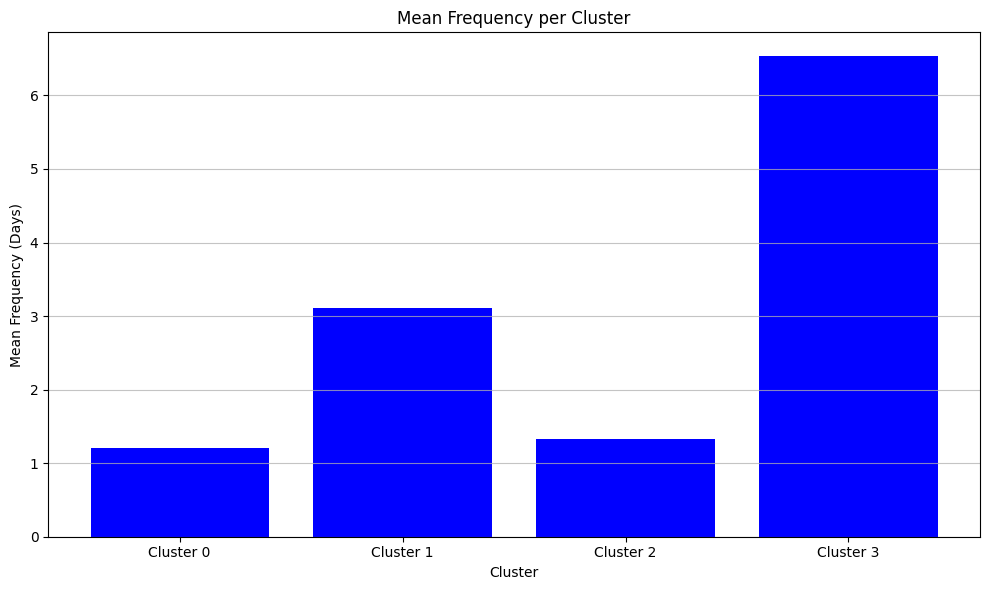

In [518]:
# Plot for Frequency
plt.figure(figsize=(10, 6))
plt.bar(cluster_profiles.index, cluster_profiles['Frequency'], color='blue')
plt.title('Mean Frequency per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Frequency (Days)')
plt.xticks(cluster_profiles.index, [f'Cluster {i}' for i in cluster_profiles.index])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

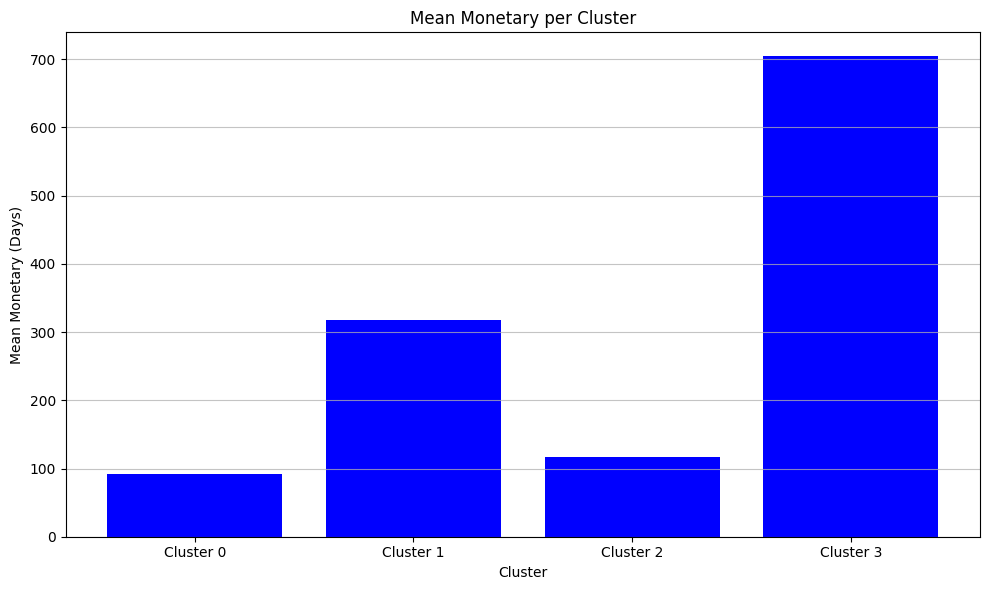

In [519]:
# Plot for Monetary
plt.figure(figsize=(10, 6))
plt.bar(cluster_profiles.index, cluster_profiles['Monetary'], color='blue')
plt.title('Mean Monetary per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Monetary (Days)')
plt.xticks(cluster_profiles.index, [f'Cluster {i}' for i in cluster_profiles.index])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [520]:
df['Version'].nunique()
version_freq = df['Version'].value_counts()
df['Version_freq'] = df['Version'].map(version_freq)
df['is_returned'].value_counts()

is_returned
0    59269
1    10783
Name: count, dtype: int64

In [521]:
df = df.drop(['Category','Version','Buyer ID','Date','Refunded Item Count','Purchased Item Count','Sales Tax','Refunds','Final Revenue','Total Revenue','Overall Revenue', 'Final Quantity'], axis = 1)

In [522]:
day_dummies = pd.get_dummies(df['day_of_week'], prefix='day')

df = pd.concat([df, day_dummies], axis=1)

df = df.drop('day_of_week', axis=1)

In [524]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

Handle Imbalances using SMOTE

In [525]:
if 'Month' in X.columns:
    X['Month'] = X['Month'].dt.month

In [526]:
from sklearn.preprocessing import LabelEncoder

# Automatically encode all object columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [527]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", y_train_bal.value_counts(normalize=True))

Before SMOTE: is_returned
0    0.5
1    0.5
Name: proportion, dtype: float64
After SMOTE: is_returned
0    0.5
1    0.5
Name: proportion, dtype: float64


Feature Engineering

Split the data for training and testing

In [528]:
X_train.shape

(17252, 17)

In [529]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

Rnadom Forest Classifier

In [530]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1
)

xgb_model.fit(X_train, y_train)
predictions = xgb_model.predict(X_test)

print(predictions)
print(accuracy_score(predictions , y_test))
print(confusion_matrix(predictions , y_test))

[0 1 0 ... 1 0 1]
0.7633286972647195
[[1323  187]
 [ 834 1970]]


In [531]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import itertools

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.7, 0.9, 1],
    'gamma': [0, 1],
    'min_child_weight': [1, 3, 5]
}

param_list = list(itertools.product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['learning_rate'],
    param_grid['subsample'],
    param_grid['colsample_bytree'],
    param_grid['gamma'],
    param_grid['min_child_weight']
))

print(f"Total combinations to test: {len(param_list)}")

def train_and_score(params):
    (n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma, min_child_weight) = params
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        min_child_weight=min_child_weight,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    f1 = grid_search.scoring(model, X_test, y_test) if hasattr(grid_search, 'scoring') else None
    return (params, f1)

results = []
for params in tqdm(param_list, desc="Tuning XGBoost Hyperparameters"):
    (n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma, min_child_weight) = params
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        min_child_weight=min_child_weight,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results.append((params, score))

best_params, best_score = max(results, key=lambda x: x[1])

print("\nBest Parameters Found:")
print(best_params)
print("\nBest Accuracy Score:", best_score)

Total combinations to test: 972


Tuning XGBoost Hyperparameters: 100%|██████████| 972/972 [07:52<00:00,  2.06it/s]


Best Parameters Found:
(200, 4, 0.01, 1, 0.7, 0, 1)

Best Accuracy Score: 0.7730644413537321
